# Random Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Load the Training, Testing and Evaluation Data

In [4]:
# Load the data
X_train = pd.read_pickle('model/X_train.pkl')
y_train = pd.read_pickle('model/y_train.pkl')
X_test = pd.read_pickle('model/X_test.pkl')
y_test = pd.read_pickle('model/y_test.pkl')
X_recommend = pd.read_pickle('model/X_recommend.pkl')

In [5]:
X_train.head()

,popularity,explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,...,urban contemporary,vallenato,vapor trap,vapor twitch,video game music,viral pop,viral rap,weirdcore,west coast rap,yacht rock
1213,4,False,220653,0.780,0.856,10,-5.316,0,0.0405,0.11600,...,0,0,0,0,0,0,0,0,0,0
71,84,False,173333,0.726,0.431,8,-8.765,0,0.1350,0.73100,...,0,0,0,0,0,0,0,0,0,0
1058,0,False,182506,0.791,0.907,0,-2.223,1,0.0884,0.01320,...,0,0,0,0,0,0,0,0,0,0
756,77,True,205158,0.533,0.858,2,-4.212,1,0.0766,0.00021,...,0,0,0,0,0,0,0,0,0,0
317,62,False,109735,0.670,0.609,7,-10.088,1,0.0333,0.74900,...,0,0,0,0,0,0,0,0,0,0


Since Random Forest is a Tree-based algorithm, it is fairly insensitive to the scale of the features, thus we wont scale the features for this model.

### Hyperparameter Tuning

We will tune for:
- The number of trees in the forest (n_estimators)
- The maximum depth of the tree (max_depth)
- The minimum number of samples required to split an internal node (min_samples_split)
- The minimum number of samples required to be at a leaf node (min_samples_leaf)
- Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree (bootstrap)

In [6]:
# Check accuracy for each value for each hyperparameter in its range
# We will use GridSearchCV to automate this process

n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

#Convert to dictionary
hyperparameters = dict(n_estimators=n_estimators,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf,
                      bootstrap=bootstrap)

print(hyperparameters)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [7]:
# estimator = ML model to be tested
# param_grid = dictionary of hyperparameters to be tested
# n_jobs = number of cores to be used in parallel, -1 means use all
# cv = number of cross validation set elements
# verbose = setting it to 2 will print updates to the terminal

best_model = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=hyperparameters,
                         n_jobs=-1,
                         cv=10,
                         verbose=2)

# Fit the model
best_model = best_model.fit(X_train,y_train)

Fitting 10 folds for each of 1980 candidates, totalling 19800 fits


In [8]:
n_estimators = best_model.best_estimator_.get_params()['n_estimators']
max_depth = best_model.best_estimator_.get_params()['max_depth']
min_samples_split = best_model.best_estimator_.get_params()['min_samples_split']
min_samples_leaf = best_model.best_estimator_.get_params()['min_samples_leaf']
bootstrap = best_model.best_estimator_.get_params()['bootstrap']

print(f'Best n_estimators: {n_estimators}')
print(f'Best max_depth: {max_depth}')
print(f'Best min_samples_split: {min_samples_split}')
print(f'Best min_samples_leaf: {min_samples_leaf}')
print(f'Best bootstrap: {bootstrap}')

Best n_estimators: 1600
Best max_depth: 60
Best min_samples_split: 2
Best min_samples_leaf: 1
Best bootstrap: False


### Model

In [9]:

# model
decision_tree = RandomForestClassifier(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      bootstrap=bootstrap)

# fit the model
decision_tree.fit(X_train, y_train)

# prediction
predictions = decision_tree.predict(X_test)

### Visualizing the Confusion Matrix

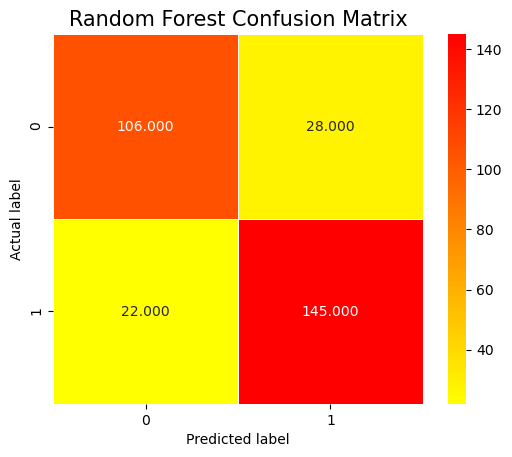

In [14]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'autumn_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Random Forest Confusion Matrix', size = 15);
plt.show()

In [15]:
precision_macro_average = precision_score(y_test, predictions, average='macro')
precision_weighted_average = precision_score(y_test, predictions, average='weighted')

recall_macro_average = recall_score(y_test, predictions, average='macro')
recall_weighted_average = recall_score(y_test, predictions, average='weighted')

f1_macro_average = f1_score(y_test, predictions, average='macro')
f1_weighted_average = f1_score(y_test, predictions, average='weighted')


print(f'Precision (macro average)--> {round(precision_macro_average*100, 2)}%')
print(f'Precision (weighted average)--> {round(precision_weighted_average*100, 2)}%')

print(f'Recall (macro average)--> {round(recall_macro_average*100, 2)}%')
print(f'Recall (weighted average)--> {round(recall_weighted_average*100, 2)}%')

print(f'F1 score (macro average)--> {round(f1_macro_average*100, 2)}%')
print(f'F1 score (weighted average)--> {round(f1_weighted_average*100, 2)}%')

Precision (macro average)--> 83.31%
Precision (weighted average)--> 83.37%
Recall (macro average)--> 82.97%
Recall (weighted average)--> 83.39%
F1 score (macro average)--> 83.11%
F1 score (weighted average)--> 83.35%


In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       134
           1       0.84      0.87      0.85       167

    accuracy                           0.83       301
   macro avg       0.83      0.83      0.83       301
weighted avg       0.83      0.83      0.83       301



#### This model is Good